In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, fbeta_score, f1_score
from sklearn.cluster import KMeans 
from loader import load_data

In [2]:
df = load_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Columns: 194 entries, Unnamed: 0 to neckradicolopathy
dtypes: float64(192), int64(2)
memory usage: 3.1 MB


Show age in box plot

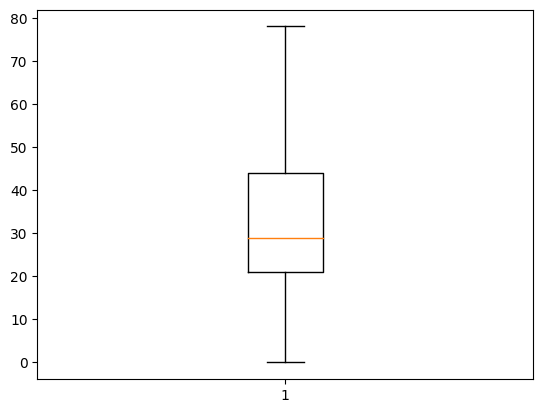

In [3]:
df = df[~df['age'].isna()]
plt.boxplot(df['age'], showfliers=False)
plt.show()

Scatter plot for len and weight.

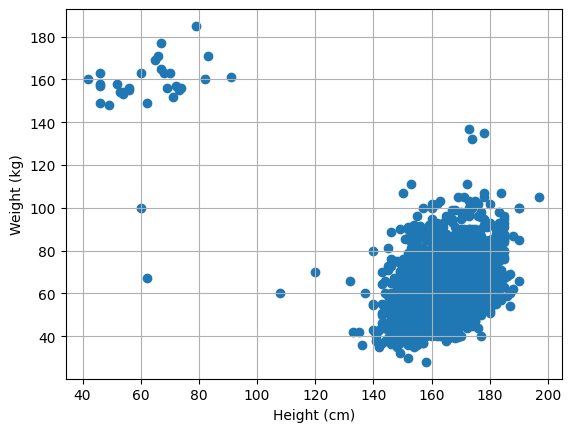

In [7]:
df = df[~df['len'].isna() & ~df['weight'].isna()]
plt.scatter(df['len'], df['weight'])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid()
plt.show()

Calculate KneeOA and age correlation

In [61]:
print("Correlation:", df['age'].corr(df['KneeOA'], method='spearman'))

Correlation: 0.3454504752502102


Apply regression for `birthdat` column using `Agegroup` and `age` columns.

In [9]:
print("Birthday missing count:", df['birthdat'].isna().sum())
print("Correlation birthday and age group:", df['birthdat'].corr(df['Agegroup']))

df2 = df[~df['birthdat'].isna()]

X, y = df2[['age', 'Agegroup']], df2['birthdat']
reg = LinearRegression().fit(X, y)
reg.fit(X, y)

X_pred = df[df['birthdat'].isna()][['age', 'Agegroup']]
df['birthdat'].loc[df['birthdat'].isna()] = reg.predict(X_pred)
print("Birthday missing count after regression:", df['birthdat'].isna().sum())


Birthday missing count: 32
Correlation birthday and age group: -0.9663965862457486
Birthday missing count after regression: 0


Classification using Decision Tree, Bagging and KNN

In [10]:
df['knee'].corr(df['KneeOA'])
df0 = df[['age', 'weight', 'len', 'kn.pain', 'KneeOA']]
df0 = df0[~df0['kn.pain'].isna()]

X = df0.iloc[:,:-1] # this is the {age, weight, len, kn.pain} sets 
y = df0.iloc[:,-1]  # {KneeOA} set

k = 10
kf = KFold(n_splits=k)

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=kf)
print("Decision Tree:", scores.mean())

scores = cross_val_score(BaggingClassifier() , X, y, cv=kf)
print("Bagging:", scores.mean())

scores = cross_val_score(KNeighborsClassifier(3), X, y, cv=kf)
print("KNN:", scores.mean())

scores = cross_val_score(SVC(kernel='linear', C=1.0), X, y, cv=kf)
print("SVM:", scores.mean())

Decision Tree: 0.7955607147882369
Bagging: 0.8279137939121053
KNN: 0.7979714835139065
SVM: 0.8438886543783125


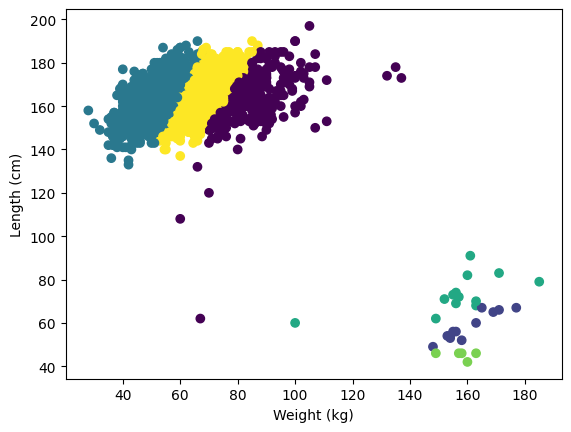

In [72]:
df['BMI'] = df['weight'] / (df['len']/100 ** 2)
kmeans = KMeans(n_clusters=6, n_init=10)
kmeans.fit(df[['len', 'weight', 'BMI']])

plt.scatter(df['weight'], df['len'], c=kmeans.labels_)
plt.ylabel("Length (cm)")
plt.xlabel("Weight (kg)")
plt.show()
